# Prediksi Kelulusan Mahasiswa Dengan Algoritma Decision Tree Metode C4.5




In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


## 1. Memuat Dataset

Dataset berisi data akademik mahasiswa angkatan 2020/2023 yang digunakan
untuk memprediksi kelulusan.


In [16]:

df = pd.read_csv('dataset_angkatan_2023.csv')
df.head()


,Nama,Angkatan,Kehadiran,Tugas,UTS,UAS,IPK,Prediksi
0,Mahasiswa_2023_1,2023,98,73,88,66,3.09,Tepat
1,Mahasiswa_2023_2,2023,81,91,92,67,3.23,Tepat
2,Mahasiswa_2023_3,2023,98,87,89,68,3.24,Tepat
3,Mahasiswa_2023_4,2023,76,89,85,91,3.49,Telat
4,Mahasiswa_2023_5,2023,78,90,68,61,2.82,Telat


## 2. Perhitungan Entropy

Entropy digunakan untuk mengukur tingkat ketidakpastian data.
Semakin kecil entropy, semakin homogen data tersebut.


In [17]:
def calculate_entropy(data_labels):
    if len(data_labels) == 0:
        return 0
    
    counts = data_labels.value_counts()
    probs = counts / len(data_labels)
    
    entropy = -sum(probs * np.log2(probs))
    return entropy


## 3. Perhitungan Information Gain dan Gain Ratio (C4.5)

C4.5 menggunakan Gain Ratio untuk memilih atribut terbaik
dalam pembentukan pohon keputusan.


In [18]:
def calculate_c45_metrics(df, feature, target):
   
    total_entropy = calculate_entropy(df[target])
    unique_vals = sorted(df[feature].unique())
    
    best_gain = 0
    best_ratio = 0
    best_threshold = None
    
    for i in range(len(unique_vals) - 1):
        threshold = (unique_vals[i] + unique_vals[i + 1]) / 2
        
        low = df[df[feature] <= threshold][target]
        high = df[df[feature] > threshold][target]
        
        if len(low) == 0 or len(high) == 0:
            continue
        
        p_low = len(low) / len(df)
        p_high = len(high) / len(df)
        
        entropy_split = (
            p_low * calculate_entropy(low) +
            p_high * calculate_entropy(high)
        )
        
        gain = total_entropy - entropy_split
        
        split_info = -(
            p_low * np.log2(p_low) +
            p_high * np.log2(p_high)
        )
        
        gain_ratio = gain / split_info if split_info != 0 else 0
        
        if gain_ratio > best_ratio:
            best_gain = gain
            best_ratio = gain_ratio
            best_threshold = threshold
    
    return best_gain, best_ratio, best_threshold


## 4. Hasil Perhitungan C4.5

Menampilkan nilai Gain, Gain Ratio, dan Threshold terbaik
untuk setiap atribut.


In [19]:
target = 'Prediksi'
features = ['Kehadiran', 'Tugas', 'UTS', 'UAS', 'IPK']

print("Entropy Total:", calculate_entropy(df[target]), "\n")

for feature in features:
    gain, ratio, threshold = calculate_c45_metrics(df, feature, target)
    print(f"{feature:10} | Gain: {gain:.4f} | Gain Ratio: {ratio:.4f} | Threshold <= {threshold:.2f}")


Entropy Total: 0.9709505944546686 

Kehadiran  | Gain: 0.2459 | Gain Ratio: 0.3877 | Threshold <= 79.50
Tugas      | Gain: 0.0133 | Gain Ratio: 0.1650 | Threshold <= 98.50
UTS        | Gain: 0.0133 | Gain Ratio: 0.1650 | Threshold <= 61.50
UAS        | Gain: 0.1605 | Gain Ratio: 0.3210 | Threshold <= 64.50
IPK        | Gain: 0.0690 | Gain Ratio: 0.2408 | Threshold <= 2.85


## 5. Pembuatan Model Decision Tree

Model dibuat menggunakan entropy sebagai kriteria,
sesuai dengan konsep algoritma C4.5.


In [20]:
X = df[features]
y = df[target]

clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)

clf.fit(X, y)


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 6. Visualisasi Pohon Keputusan

Visualisasi digunakan untuk memahami proses pengambilan keputusan
dalam model Decision Tree.


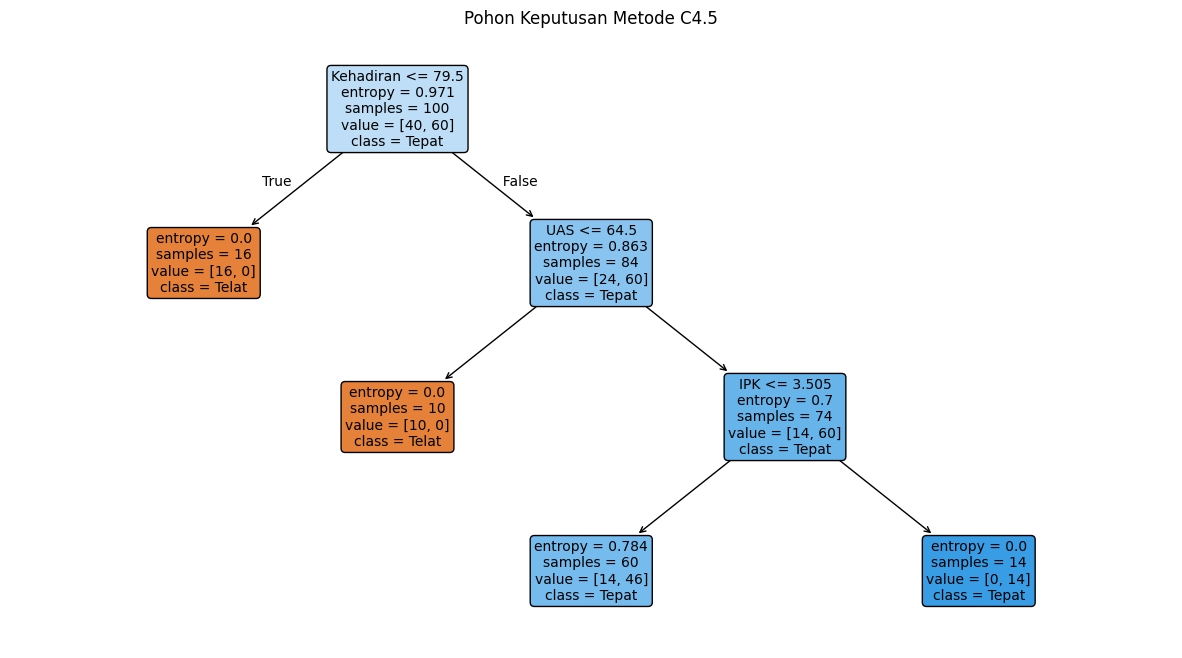

In [21]:
plt.figure(figsize=(15, 8))

plot_tree(
    clf,
    feature_names=features,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Pohon Keputusan Metode C4.5")
plt.show()
